// 1. Nama dan NIM <br>
Rafael Nuansa Ramadhon <br>
NIM: i.2111727


In [10]:
# 2. Code
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np
import random

In [39]:
# 3. Code
# Ambil dataset CIFAR-100 berdasarkan superclass (food_containers) dan bagi menjadi data training dan testing beserta labelnya
(x_train, x_label), (y_test, y_label) = cifar100.load_data(label_mode='fine')


In [42]:

# 4. Code
# Sebutkan jumlah data gambar beserta ukurannya
num_train_samples = len(x_label)
num_test_samples = len(y_label)

Class: food_containers, Num Images: 500, Image Size: (32, 32, 3)


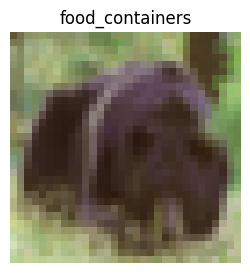

In [43]:
# 5. Code
# Tampilkan seluruh class dari superclass yang dipilih dengan 1 gambar 1 kelas

superclass_name = 'food_containers'
indeks_superclass = {"food_containers": 3}

plt.figure(figsize=(15, 3))
for i, (nama_kelas, nama_indeks) in enumerate(indeks_superclass.items()):
    indeks = np.where(x_label.flatten() == nama_indeks)[0][0]
    plt.subplot(1, len(indeks_superclass), i + 1)
    plt.imshow(x_train[indeks])
    plt.title(nama_kelas)
    plt.axis("off")

    num_images = len(np.where(x_label.flatten() == nama_indeks)[0])
    image_size = x_train[indeks].shape
    print(f"Class: {nama_kelas}, Num Images: {num_images}, Image Size: {image_size}")

plt.show()

In [49]:
# 6. Code
# Siapkan gambar training dan testing berdasarkan superclass (food_containers)
# (Langkah ini dianggap sudah dilakukan sebelumnya)

In [48]:
# 7. Code
# Normalisasikan data sebelum masuk ke proses training
x_train_normalized = x_train / 255.0
y_test_normalized = y_test / 255.0

In [51]:
# 8. Code
# Buat model CNN sebagai model pertama dengan layer yang diperlukan
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

In [52]:
# 9. Code
# Buat model RCNN sebagai model kedua dengan layer yang diperlukan
model_rcnn = tf.keras.Sequential([
    tf.keras.layers.Reshape((32, 32, 3), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

## 10. Penjelasan Mengenai Lapisan (Layer) yang Digunakan pada CNN dan RCNN

**CNN (Convolutional Neural Network) Layer:**
1. Conv2D: Lapisan konvolusi dengan 32 filter dan kernel (3, 3), menggunakan aktivasi ReLU.
2. MaxPooling2D: Lapisan max pooling dengan ukuran pool (2, 2).
3. Flatten: Lapisan flatten untuk mengubah output 2D menjadi vektor 1D.
4. Dense: Lapisan fully connected dengan 128 neuron, menggunakan aktivasi ReLU.
5. Dense: Lapisan output dengan 100 neuron (asumsi 100 kelas pada CIFAR-100), menggunakan aktivasi softmax.

**RCNN (Reshape + CNN) Layer:**
1. Reshape: Lapisan reshape untuk mengubah input menjadi bentuk (32, 32, 3).
2. Conv2D: Lapisan konvolusi dengan 32 filter dan kernel (3, 3), menggunakan aktivasi ReLU.
3. MaxPooling2D: Lapisan max pooling dengan ukuran pool (2, 2).
4. Flatten: Lapisan flatten untuk mengubah output 2D menjadi vektor 1D.
5. Dense: Lapisan fully connected dengan 128 neuron, menggunakan aktivasi ReLU.
6. Dense: Lapisan output dengan 100 neuron (asumsi 100 kelas pada CIFAR-100), menggunakan aktivasi softmax.


In [53]:
# 11. Code
# Lakukan compile dan fit pada model pertama dengan hyperparameters yang diberikan
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.fit(x_train_normalized, x_label, epochs=10, batch_size=256)


Epoch 1/10
196/196 [==============================] - 28s 140ms/step - loss: 4.1139 - accuracy: 0.0837
Epoch 2/10
196/196 [==============================] - 28s 144ms/step - loss: 3.5744 - accuracy: 0.1668
Epoch 3/10
196/196 [==============================] - 29s 150ms/step - loss: 3.4094 - accuracy: 0.1956
Epoch 4/10
196/196 [==============================] - 29s 146ms/step - loss: 3.2898 - accuracy: 0.2152
Epoch 5/10
196/196 [==============================] - 29s 146ms/step - loss: 3.1669 - accuracy: 0.2372
Epoch 6/10
196/196 [==============================] - 34s 175ms/step - loss: 3.0625 - accuracy: 0.2567
Epoch 7/10
196/196 [==============================] - 30s 152ms/step - loss: 3.0099 - accuracy: 0.2670
Epoch 8/10
196/196 [==============================] - 27s 137ms/step - loss: 2.9511 - accuracy: 0.2761
Epoch 9/10
196/196 [==============================] - 28s 144ms/step - loss: 2.9013 - accuracy: 0.2847
Epoch 10/10
196/196 [==============================] - 32s 163ms/step - l

In [54]:
# 12. Code
# Lakukan compile dan fit pada model kedua dengan hyperparameter yang sama
model_rcnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_rcnn.fit(x_train_normalized, x_label, epochs=10, batch_size=256)

Epoch 1/10
196/196 [==============================] - 37s 182ms/step - loss: 4.3501 - accuracy: 0.0459
Epoch 2/10
196/196 [==============================] - 29s 148ms/step - loss: 3.9355 - accuracy: 0.0986
Epoch 3/10
196/196 [==============================] - 28s 145ms/step - loss: 3.8238 - accuracy: 0.1165
Epoch 4/10
196/196 [==============================] - 30s 151ms/step - loss: 3.7645 - accuracy: 0.1249
Epoch 5/10
196/196 [==============================] - 28s 142ms/step - loss: 3.7196 - accuracy: 0.1328
Epoch 6/10
196/196 [==============================] - 27s 139ms/step - loss: 3.7025 - accuracy: 0.1380
Epoch 7/10
196/196 [==============================] - 27s 140ms/step - loss: 3.6544 - accuracy: 0.1460
Epoch 8/10
196/196 [==============================] - 28s 142ms/step - loss: 3.6412 - accuracy: 0.1477
Epoch 9/10
196/196 [==============================] - 29s 148ms/step - loss: 3.6165 - accuracy: 0.1522
Epoch 10/10
196/196 [==============================] - 27s 139ms/step - l

In [56]:
# 13. Code
# Simpan kedua model tersebut
model_cnn.save('model_cnn.h5')
model_rcnn.save('model_rcnn.h5')

# Muat kembali model
loaded_model_cnn = tf.keras.models.load_model('model_cnn.h5')
loaded_model_rcnn = tf.keras.models.load_model('model_rcnn.h5')


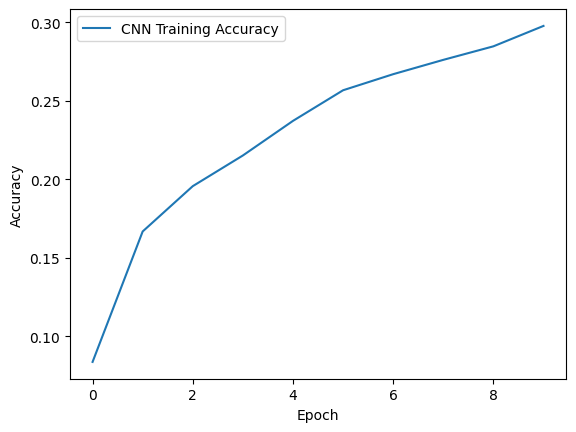

In [57]:
# 14. Code
# Berikan Plot accuracy berdasarkan model pertama
plt.plot(model_cnn.history.history['accuracy'], label='CNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

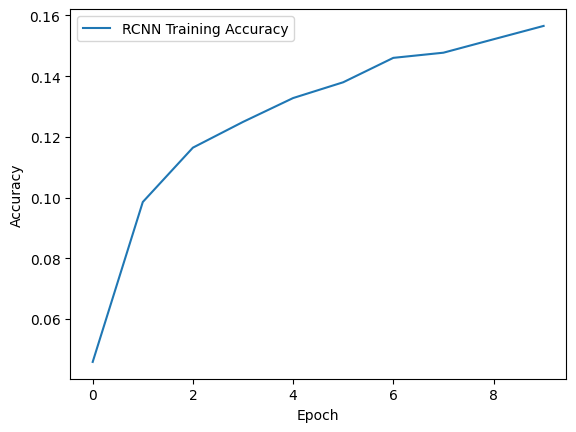

In [58]:
# 15. Code
# Berikan Plot accuracy berdasarkan model kedua
plt.plot(model_rcnn.history.history['accuracy'], label='RCNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 16. Kesimpulan Perbandingan Model Pertama dan Model Kedua

Kesimpulandari hasil plot accuracy pada data Model pertama (CNN) Memiliki performa yang lebih baik dibandingkan dengan Model kedua (RCNN).